In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp
import seaborn as sns

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')

Using cuda


In [3]:
data = pd.read_csv('data.csv').to_numpy()
data = (data - data.mean(axis=1).reshape(-1, 1)) / data.std(axis=1).reshape(-1, 1)

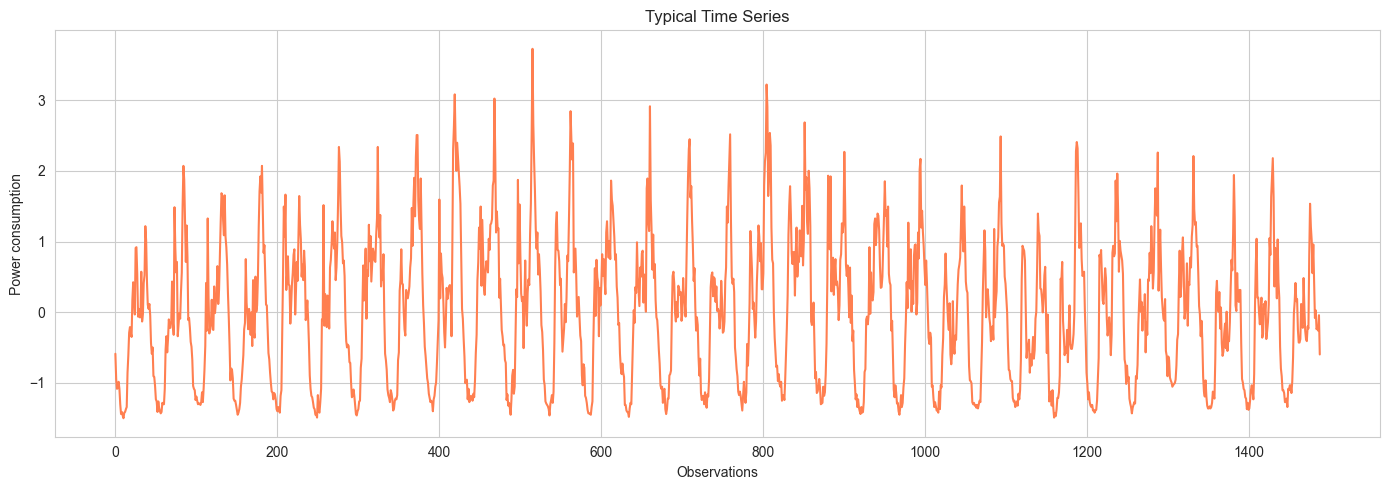

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(data[0], color='coral')
ax.set_xlabel('Observations')
ax.set_ylabel('Power consumption')
ax.set_title('Typical Time Series')
plt.tight_layout()

In [5]:
daily_data = data.reshape((1642 * 31, 48))
daily_data.shape

(50902, 48)

In [6]:
train_length = round(len(daily_data) * 0.8)

train_data = torch.tensor(daily_data[:train_length], dtype=torch.float32)
test_data = torch.tensor(daily_data[train_length:], dtype=torch.float32)
all_data = torch.tensor(daily_data, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(train_data), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data), batch_size=64, shuffle=False)
all_loader = DataLoader(TensorDataset(all_data), batch_size=64, shuffle=True)

In [7]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 24),
            nn.ReLU(),
            nn.Linear(24, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 24),
            nn.ReLU(),
            nn.Linear(24, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
# Создание модели
model = Autoencoder(input_dim=48, encoding_dim=5).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [9]:
all_train_losses = []
train_losses = []
test_losses = []

In [10]:
epochs = 20

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in train_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        all_train_losses.append(loss.item())
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')
    train_losses.append(avg_loss)
    
    model.eval()
    avg_test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch[0].to(device)
            preds = model(batch)
            loss = criterion(preds, batch)
            
            avg_test_loss += loss.item()
    avg_test_loss /= len(test_loader)
    test_losses.append(avg_test_loss)
    print(f'Test Loss: {avg_test_loss:.4f}')

Epoch 1, Loss: 0.5056
Test Loss: 0.3341
Epoch 2, Loss: 0.3029
Test Loss: 0.2774
Epoch 3, Loss: 0.2710
Test Loss: 0.2585
Epoch 4, Loss: 0.2605
Test Loss: 0.2525
Epoch 5, Loss: 0.2570
Test Loss: 0.2498
Epoch 6, Loss: 0.2552
Test Loss: 0.2489
Epoch 7, Loss: 0.2540
Test Loss: 0.2476
Epoch 8, Loss: 0.2530
Test Loss: 0.2467
Epoch 9, Loss: 0.2522
Test Loss: 0.2464
Epoch 10, Loss: 0.2515
Test Loss: 0.2457
Epoch 11, Loss: 0.2511
Test Loss: 0.2452
Epoch 12, Loss: 0.2506
Test Loss: 0.2448
Epoch 13, Loss: 0.2502
Test Loss: 0.2444
Epoch 14, Loss: 0.2499
Test Loss: 0.2442
Epoch 15, Loss: 0.2496
Test Loss: 0.2441
Epoch 16, Loss: 0.2492
Test Loss: 0.2442
Epoch 17, Loss: 0.2490
Test Loss: 0.2435
Epoch 18, Loss: 0.2488
Test Loss: 0.2433
Epoch 19, Loss: 0.2486
Test Loss: 0.2432
Epoch 20, Loss: 0.2484
Test Loss: 0.2431


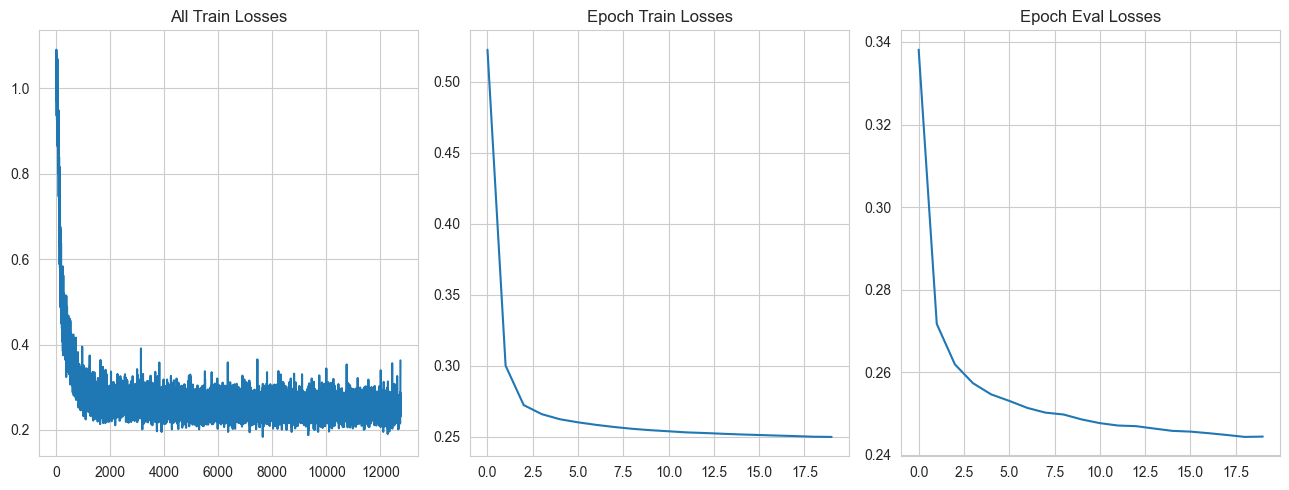

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
axes[0].plot(all_train_losses)
axes[0].set_title('All Train Losses')
axes[1].plot(train_losses)
axes[1].set_title('Epoch Train Losses')
axes[2].plot(test_losses)
axes[2].set_title('Epoch Eval Losses')
plt.tight_layout()
plt.show()

In [44]:
# Создание модели
model = Autoencoder(input_dim=48, encoding_dim=5).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [45]:
epochs = 20

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in all_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 0.5776
Epoch 2, Loss: 0.3406
Epoch 3, Loss: 0.3243
Epoch 4, Loss: 0.3196
Epoch 5, Loss: 0.3165
Epoch 6, Loss: 0.3144
Epoch 7, Loss: 0.3130
Epoch 8, Loss: 0.3121
Epoch 9, Loss: 0.3115
Epoch 10, Loss: 0.3109
Epoch 11, Loss: 0.3104
Epoch 12, Loss: 0.3099
Epoch 13, Loss: 0.3095
Epoch 14, Loss: 0.3090
Epoch 15, Loss: 0.3088
Epoch 16, Loss: 0.3086
Epoch 17, Loss: 0.3082
Epoch 18, Loss: 0.3080
Epoch 19, Loss: 0.3078
Epoch 20, Loss: 0.3076


In [57]:
errors = []
encoded = []
reconstructed = []
with torch.no_grad():
    for sample in all_data:
        inputs = sample.view(-1, 48).to(device)
        res = model(inputs).cpu().detach().flatten()
        reconstruction_error = criterion(res, sample)
        errors.append(reconstruction_error.cpu().detach().numpy())
        
        features = model.encoder(inputs).view(-1)
        encoded.append(features.cpu().detach().numpy())
        
        reconstructed.append(res.view(-1).cpu().detach().numpy())
errors = np.array(errors)
encoded = np.array(encoded)
reconstructed = np.array(reconstructed)

In [83]:
def plot_sample(sample):
    _, ax = plt.subplots(figsize=(20, 5))
    ax.plot(data[sample], label='True Row')
    pred_row = reconstructed[sample * 31:(sample + 1) * 31].reshape(-1)
    ax.plot(pred_row, label='Predicted Row')
    mse = np.linalg.norm(data[sample] - pred_row) ** 2 / len(data[sample])
    ax.set_title(f'Model Prediction VS True Row, MSE: {mse.round(2)}, Sample: {sample}')
    plt.legend()
    plt.show()

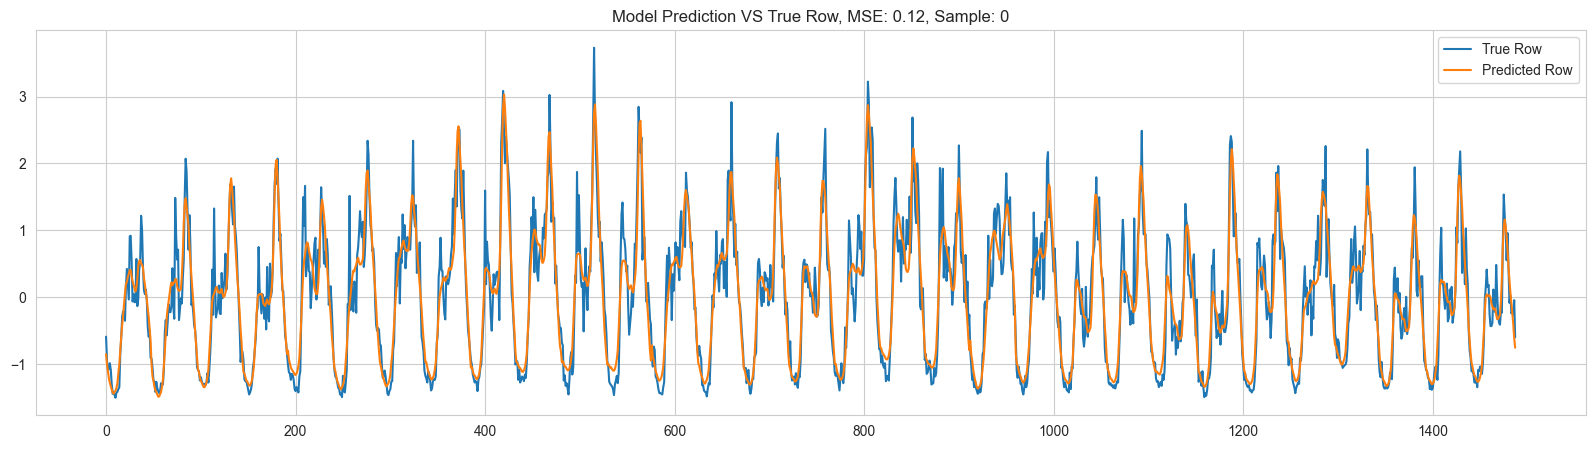

In [84]:
plot_sample(0)

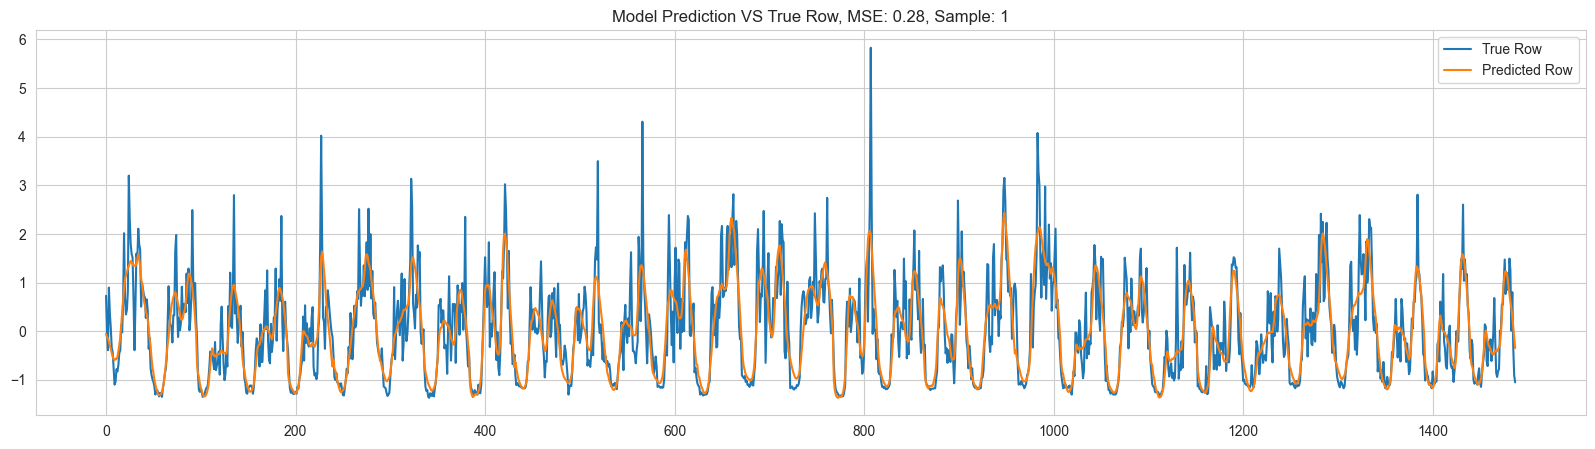

In [85]:
plot_sample(1)

In [66]:
deviation = np.linalg.norm(reconstructed - daily_data, axis=1) ** 2 / 48
deviation.mean()

0.24592008866468398

In [93]:
local_max_metric = -np.sort(-deviation)
local_max_index = np.argsort(-deviation)
local_max = np.column_stack((np.round(local_max_metric, 3), local_max_index // 31))
local_max

array([[5.871e+00, 4.630e+02],
       [3.127e+00, 6.030e+02],
       [2.909e+00, 1.422e+03],
       ...,
       [1.900e-02, 1.280e+03],
       [1.700e-02, 2.230e+02],
       [1.600e-02, 2.230e+02]])

<Axes: >

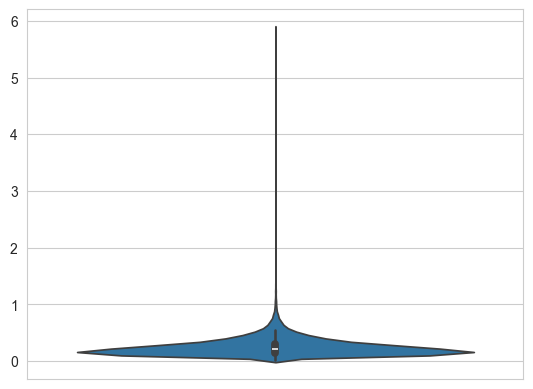

In [68]:
sns.violinplot(deviation)

In [69]:
np.quantile(local_max_metric, 0.99)

0.7615411412762247

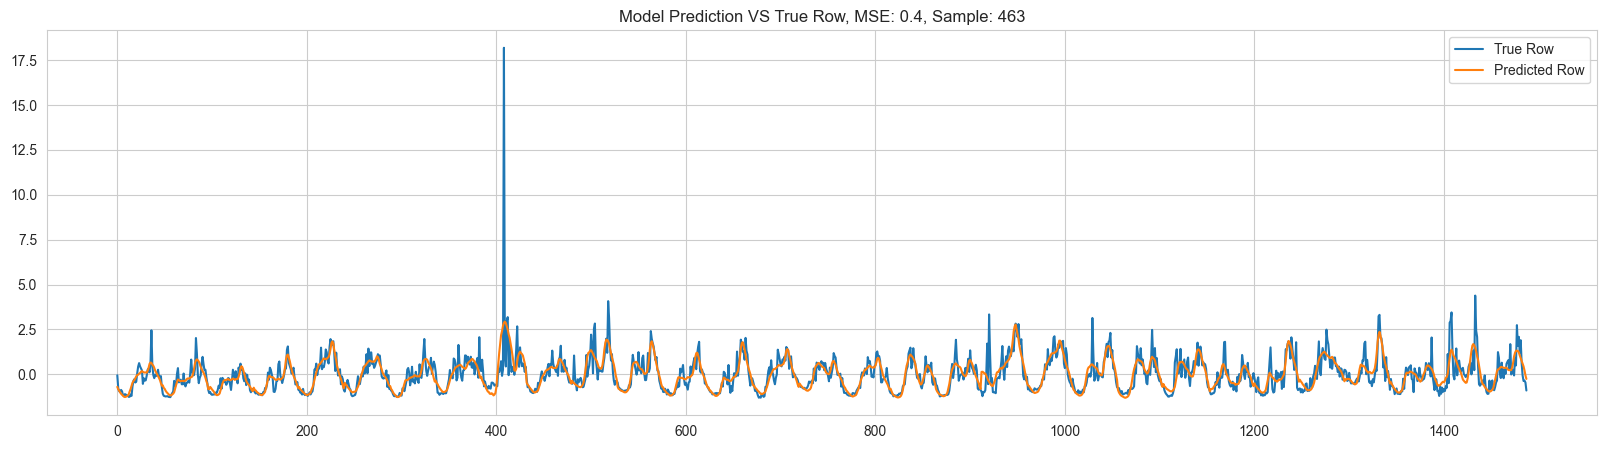

In [86]:
plot_sample(463)

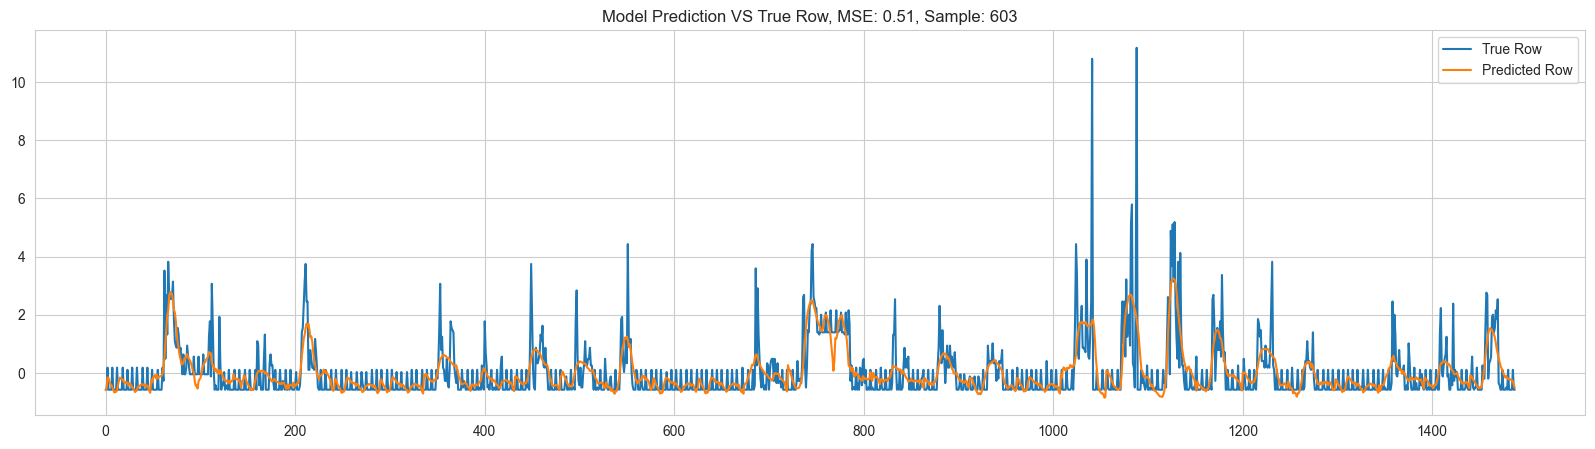

In [87]:
plot_sample(603)

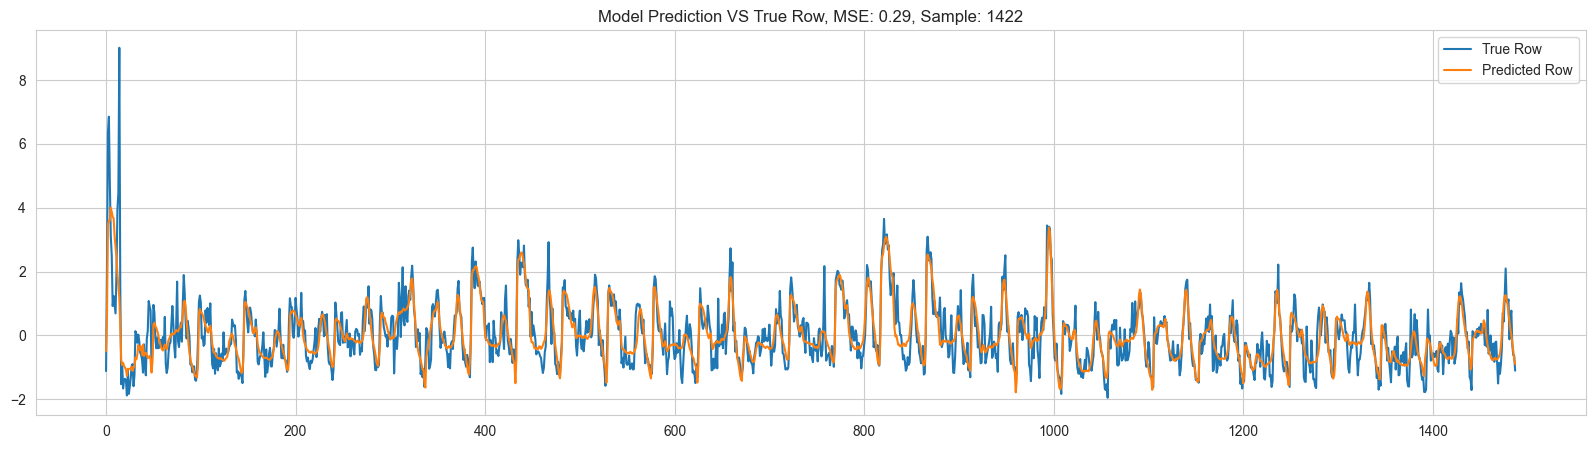

In [88]:
plot_sample(1422)

In [90]:
mean_deviation = np.mean(deviation.reshape((1642, 31)), axis=1)
mean_deviation.shape

(1642,)

In [92]:
mean_max_metric = -np.sort(-mean_deviation)
mean_max_index = np.argsort(-mean_deviation)
mean_max = np.column_stack((np.round(mean_max_metric, 3), mean_max_index))
mean_max

array([[6.460e-01, 1.162e+03],
       [6.400e-01, 9.080e+02],
       [6.380e-01, 1.225e+03],
       ...,
       [4.900e-02, 6.540e+02],
       [4.900e-02, 1.090e+02],
       [3.200e-02, 2.230e+02]])

<Axes: >

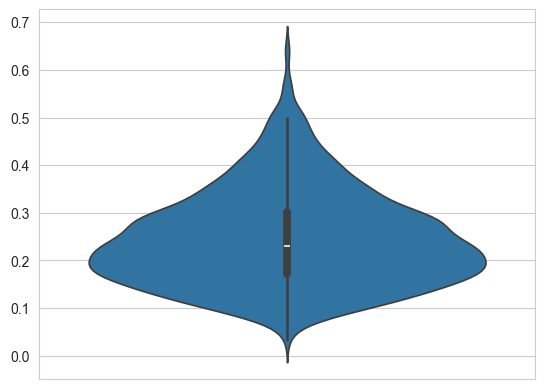

In [94]:
sns.violinplot(mean_max_metric)

In [95]:
np.quantile(mean_max_metric, 0.99)

0.513762192736674

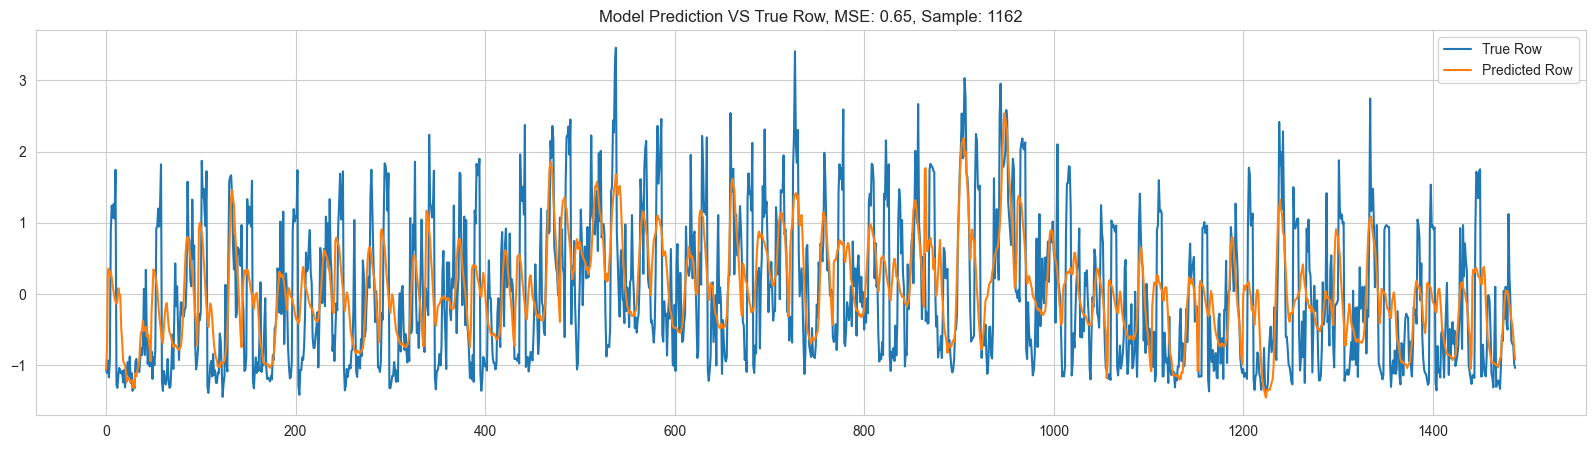

In [96]:
plot_sample(1162)

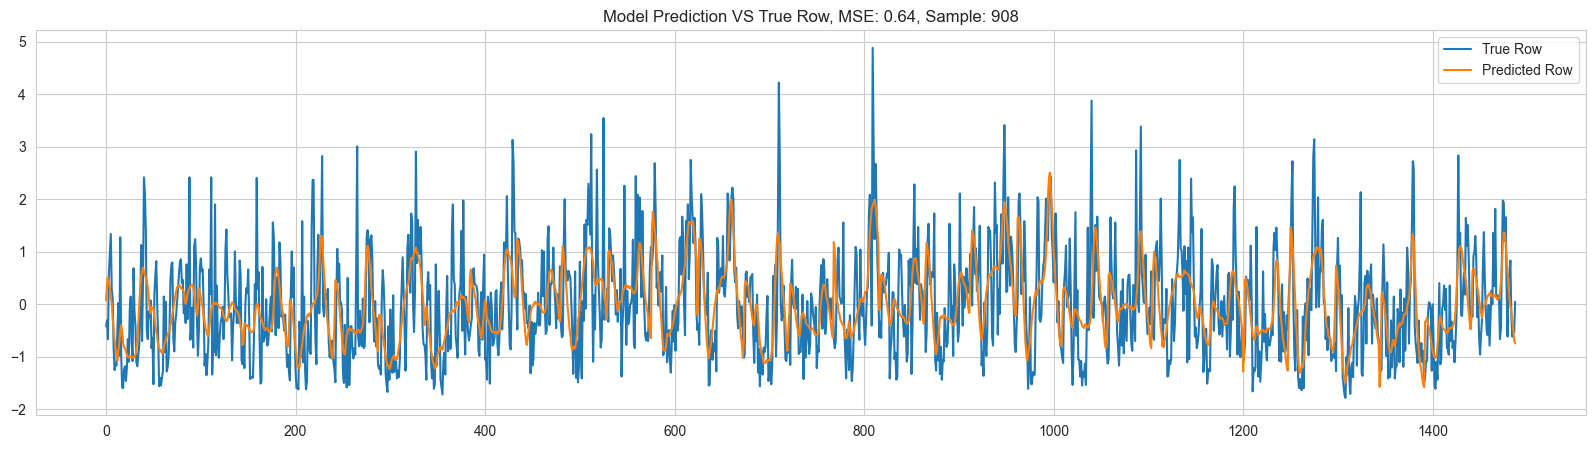

In [97]:
plot_sample(908)

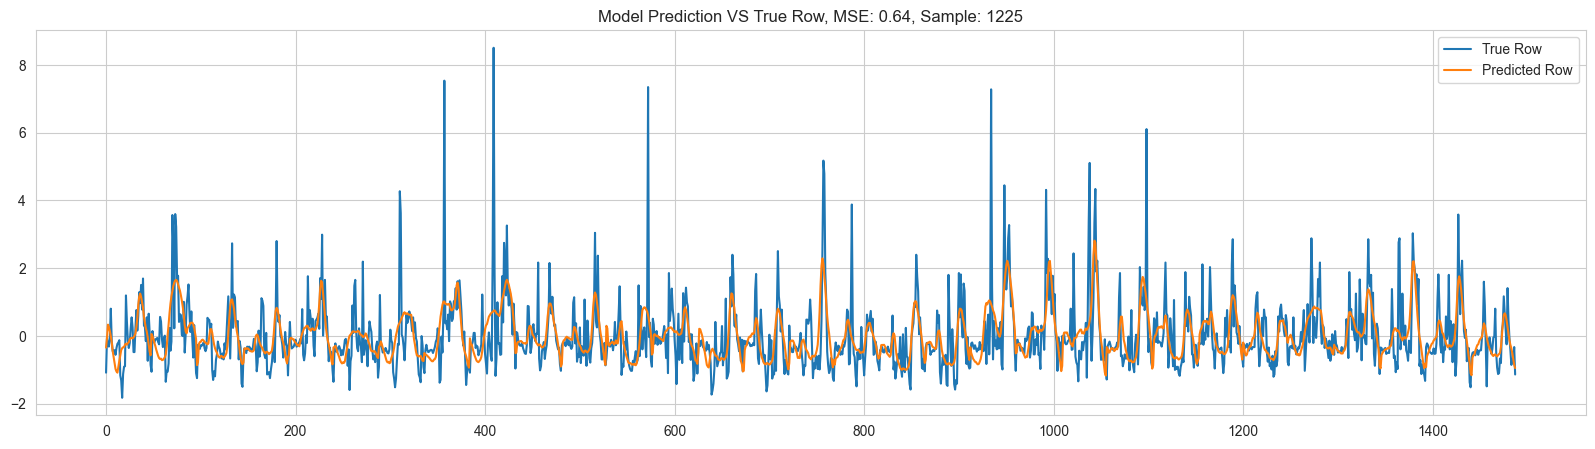

In [98]:
plot_sample(1225)

In [99]:
encoded_norm = (encoded - encoded.mean(axis=0)) / encoded.std(axis=0)

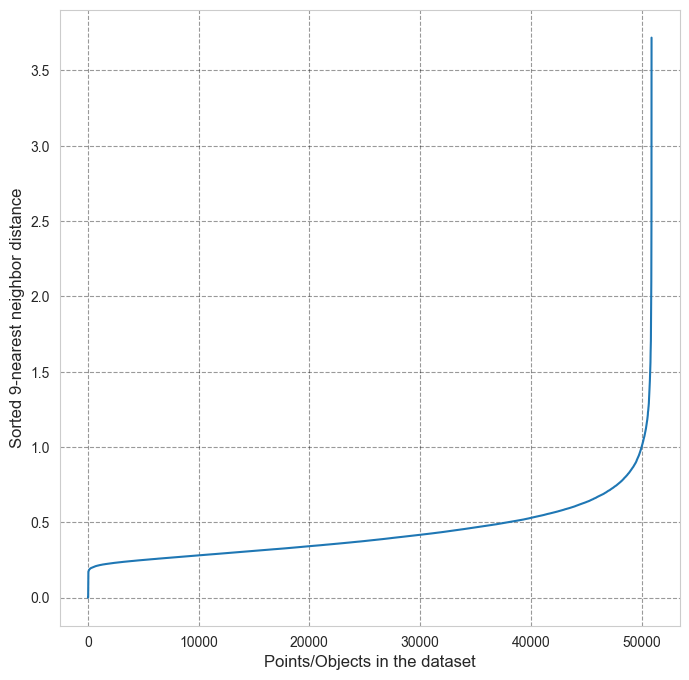

In [100]:
from sklearn.neighbors import NearestNeighbors


def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * encoded_norm.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=encoded_norm, k=k)

In [103]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)

# Проводим кластеризацию данных
clusters = dbscan.fit_predict(encoded_norm)

# Ищем объекты, отнесенные к кластеру -1 (это аномалии)
anomalies_indices = np.where(clusters == -1)[0]
anomalies_indices

array([15748, 18118, 21266, 23839, 27197, 30938, 37665, 48794, 49234],
      dtype=int64)

In [105]:
np.unique(clusters)

array([-1,  0], dtype=int64)

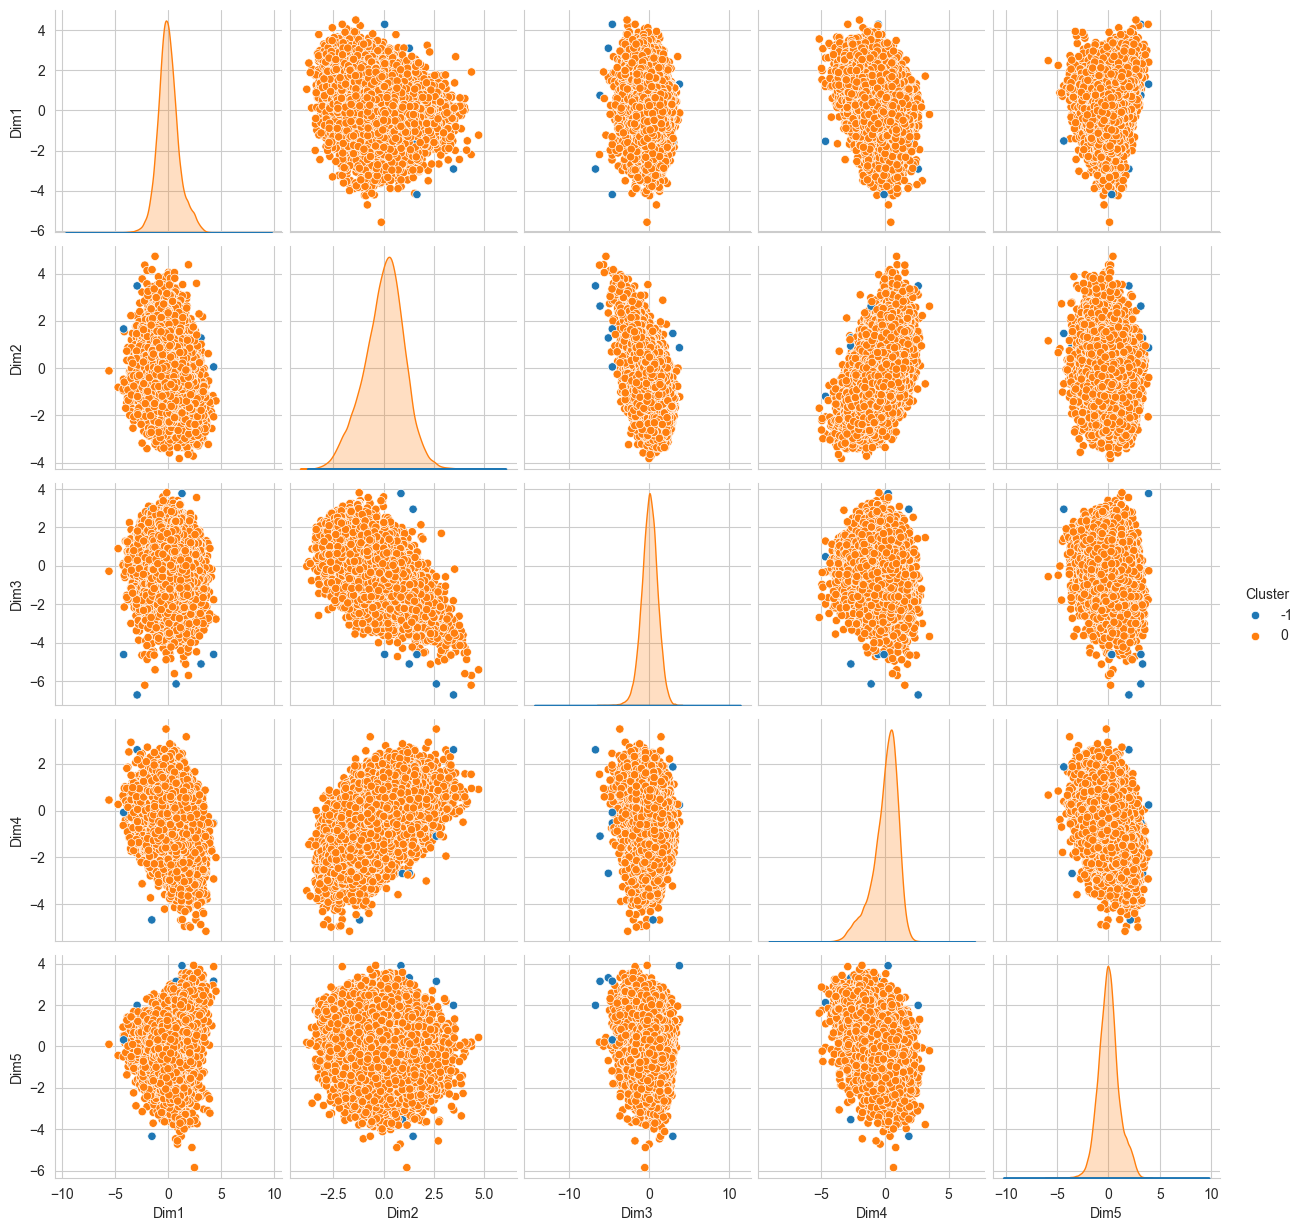

In [104]:
# Преобразуем массив данных в DataFrame
df = pd.DataFrame(encoded_norm, columns=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5'])

# Добавляем столбец 'Cluster', содержащий метки кластеров
df['Cluster'] = clusters

# Создаем pairplot, выделяя разные кластеры цветом
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()

In [108]:
anomalies_indices // 31

array([ 508,  584,  686,  769,  877,  998, 1215, 1574, 1588], dtype=int64)

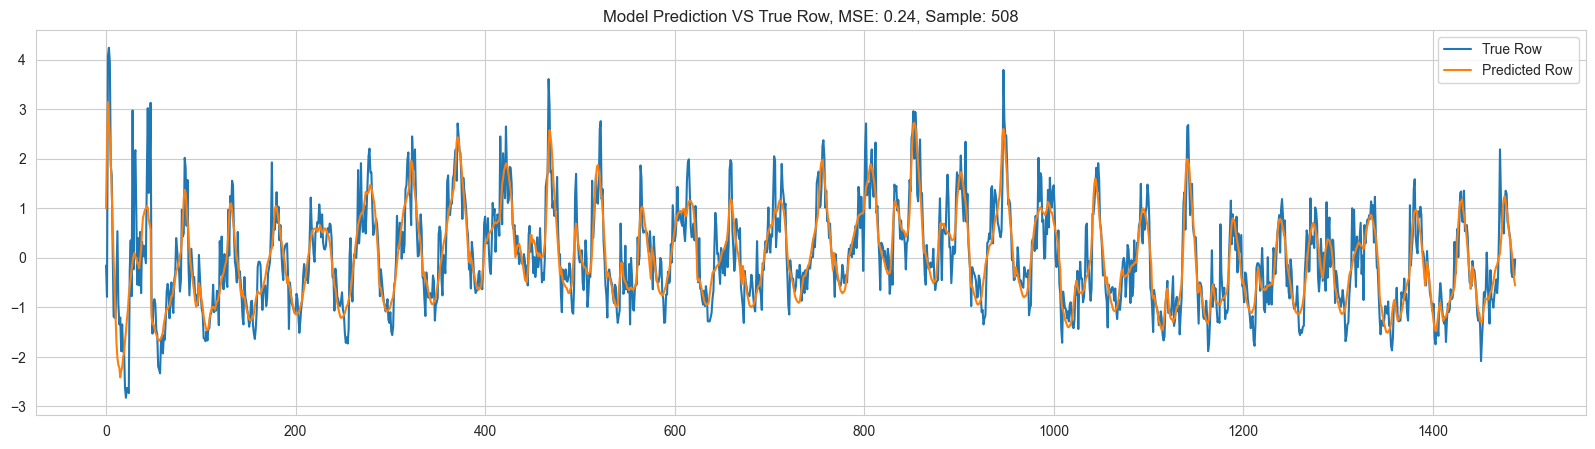

In [109]:
plot_sample(508)

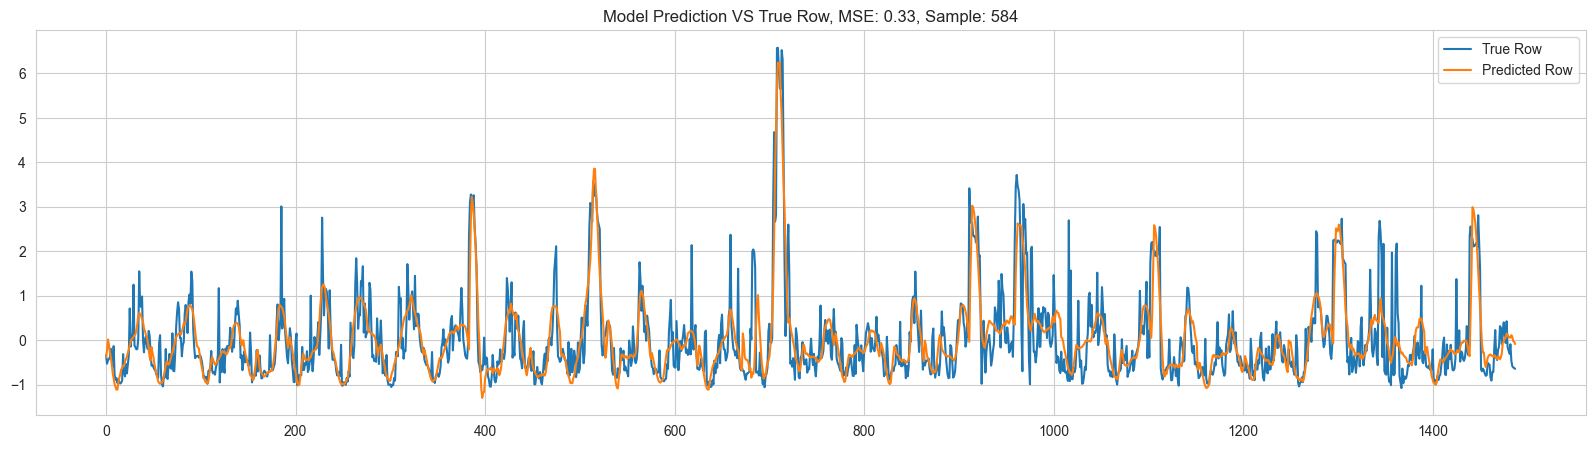

In [110]:
plot_sample(584)

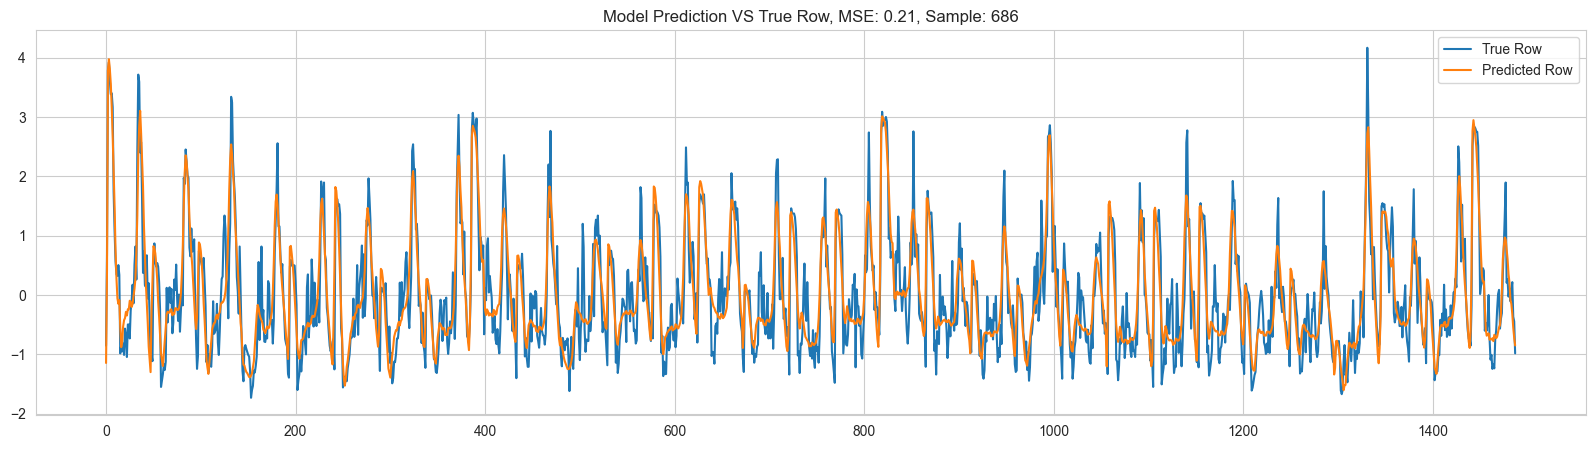

In [111]:
plot_sample(686)

In [122]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=10)

# Проводим кластеризацию данных
clusters = dbscan.fit_predict(encoded_norm)

# Ищем объекты, отнесенные к кластеру -1 (это аномалии)
anomalies_indices = np.where(clusters == -1)[0]
anomalies_indices

array([  124,   146,   171, ..., 50822, 50827, 50829], dtype=int64)

In [123]:
len(anomalies_indices)

1391

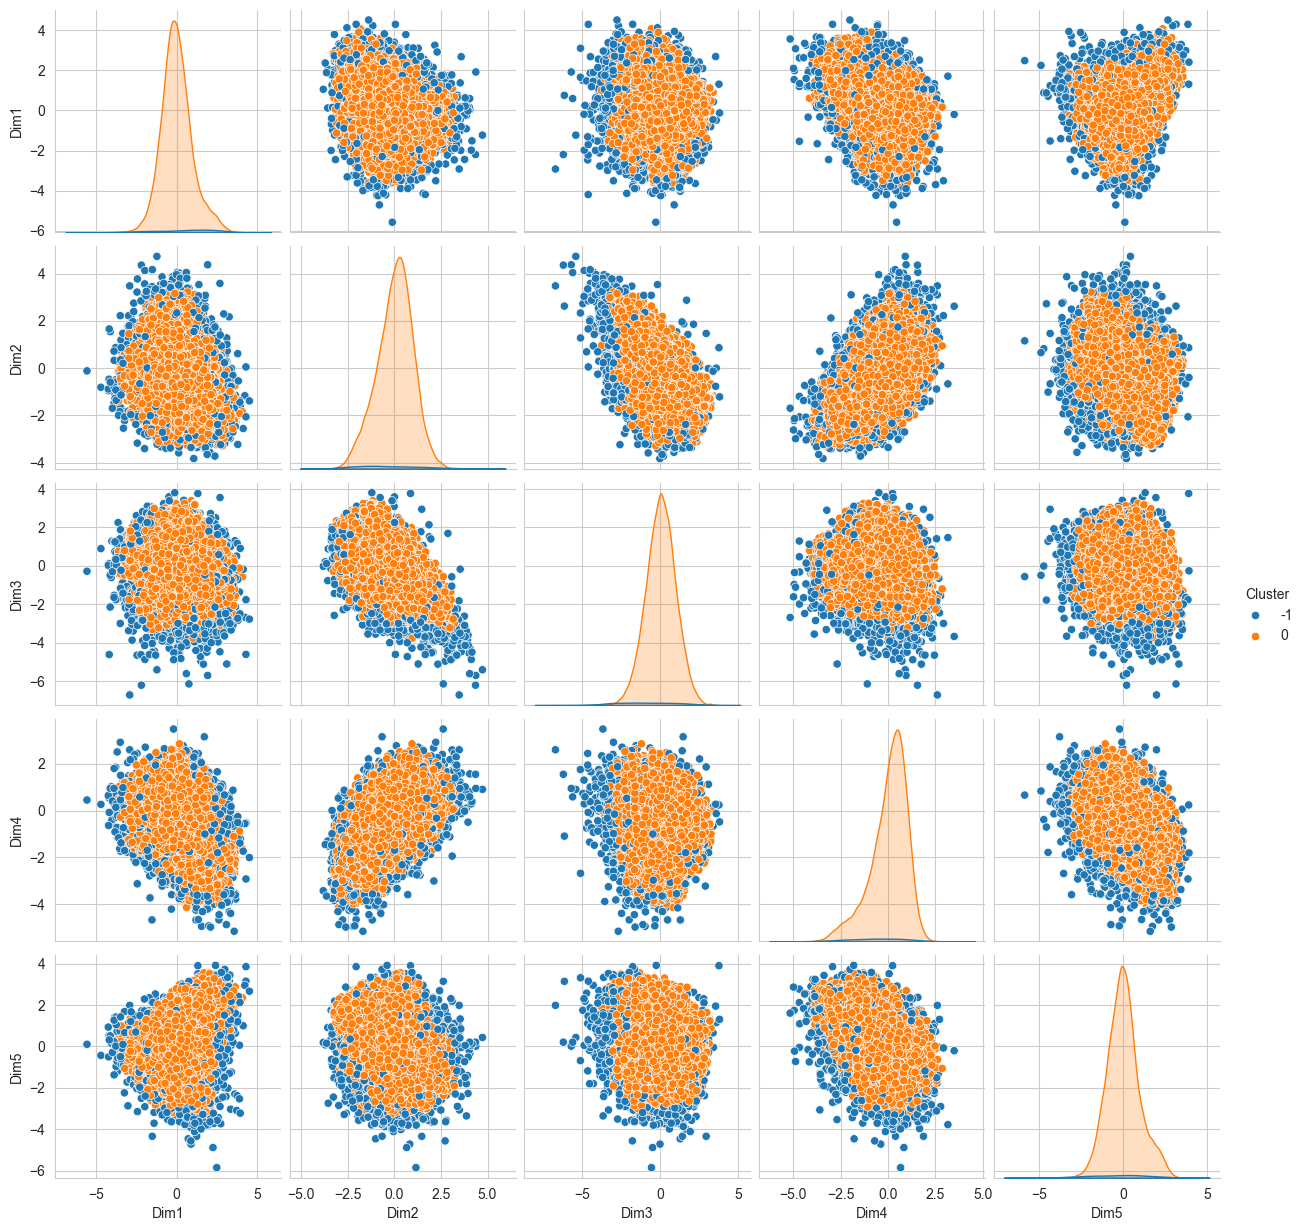

In [124]:
# Преобразуем массив данных в DataFrame
df = pd.DataFrame(encoded_norm, columns=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5'])

# Добавляем столбец 'Cluster', содержащий метки кластеров
df['Cluster'] = clusters

# Создаем pairplot, выделяя разные кластеры цветом
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()

In [125]:
# Получаем уникальные значения и их частоты
unique_values, counts = np.unique(anomalies_indices // 31, return_counts=True)

# Сортируем значения по частоте встречаемости в порядке убывания
sorted_indices = np.argsort(-counts)
sorted_values = unique_values[sorted_indices]
sorted_counts = counts[sorted_indices]

<Axes: >

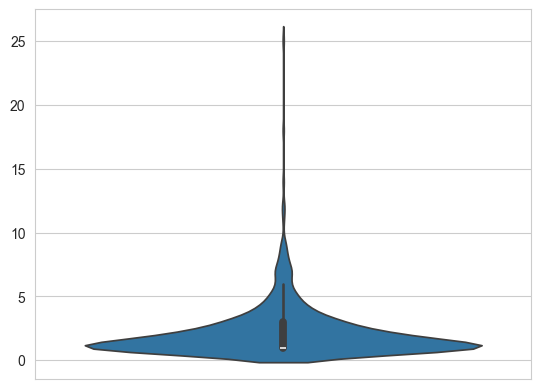

In [126]:
sns.violinplot(sorted_counts)

In [136]:
np.column_stack((sorted_values, sorted_counts)).T

array([[ 647, 1066, 1258, ..., 1000, 1062, 1169],
       [  25,   18,   14, ...,    1,    1,    1]], dtype=int64)

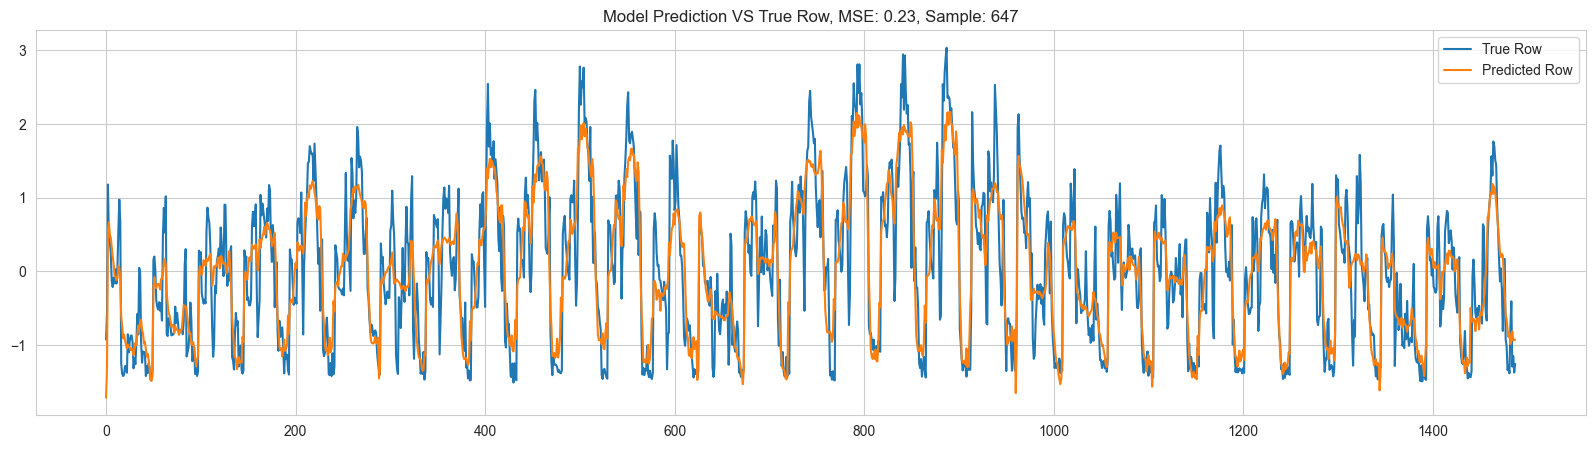

In [128]:
plot_sample(647)

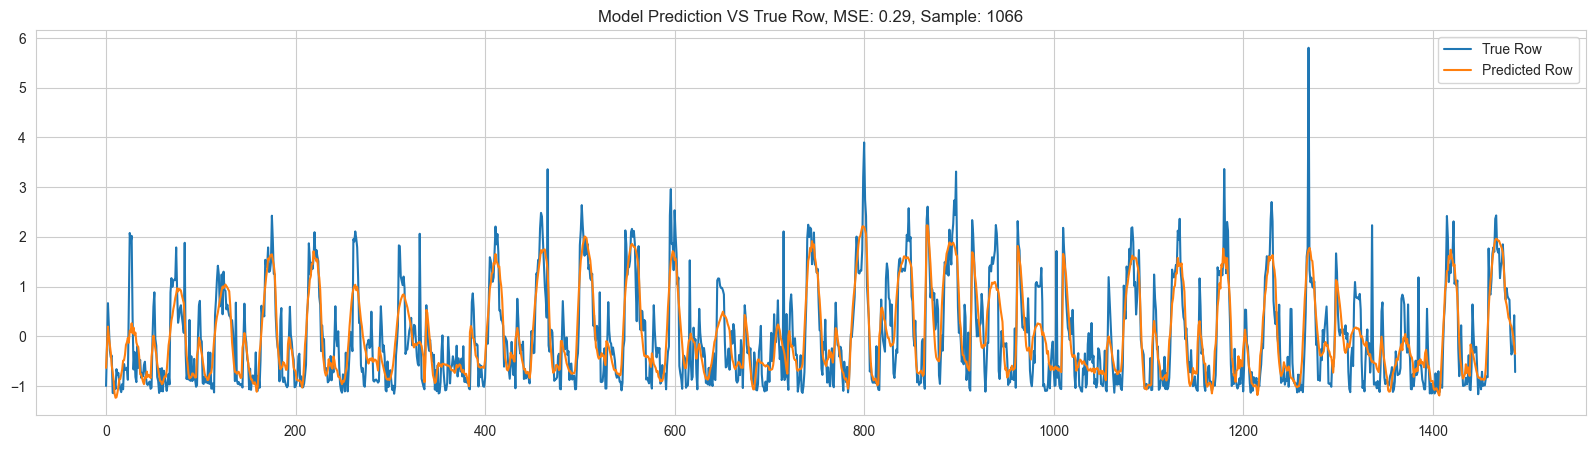

In [129]:
plot_sample(1066)

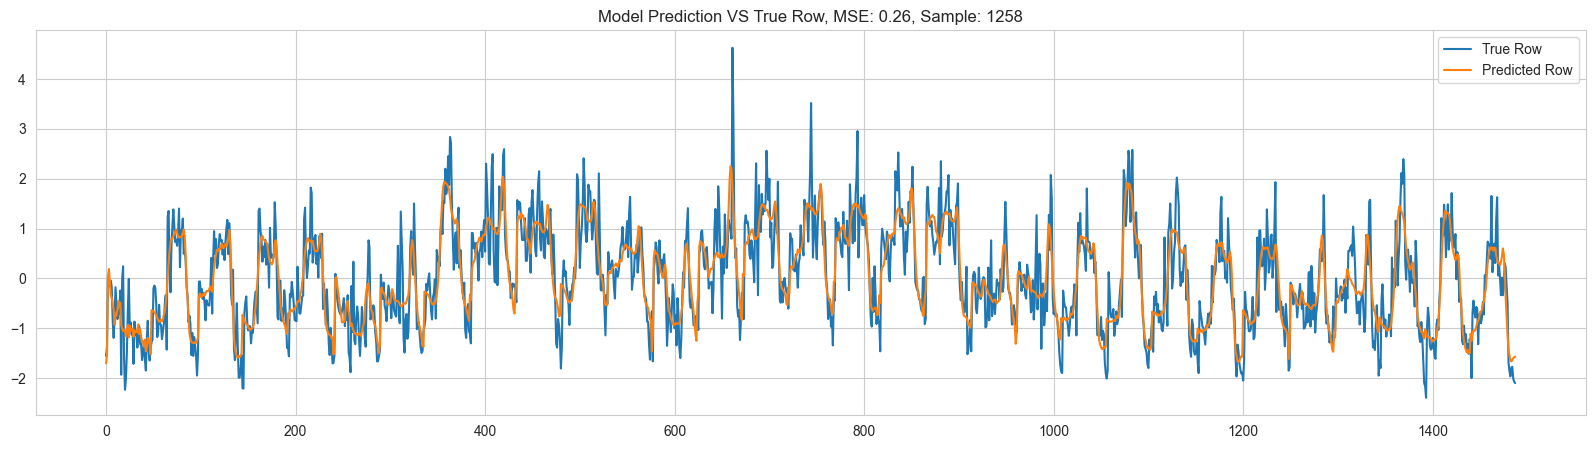

In [130]:
plot_sample(1258)

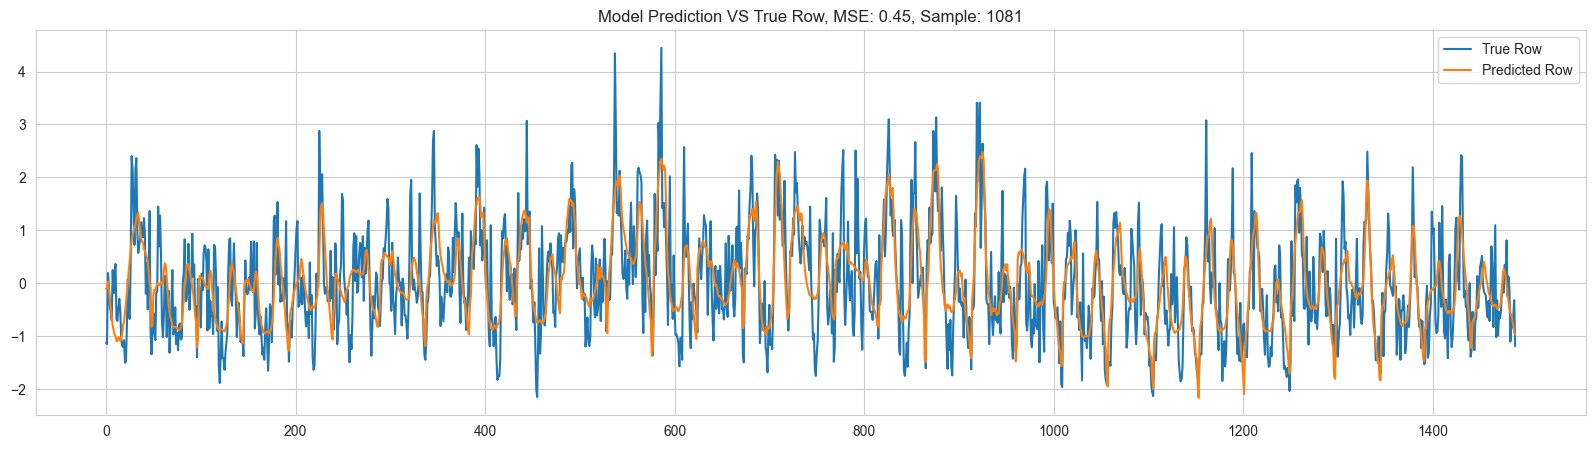

In [131]:
plot_sample(1081)

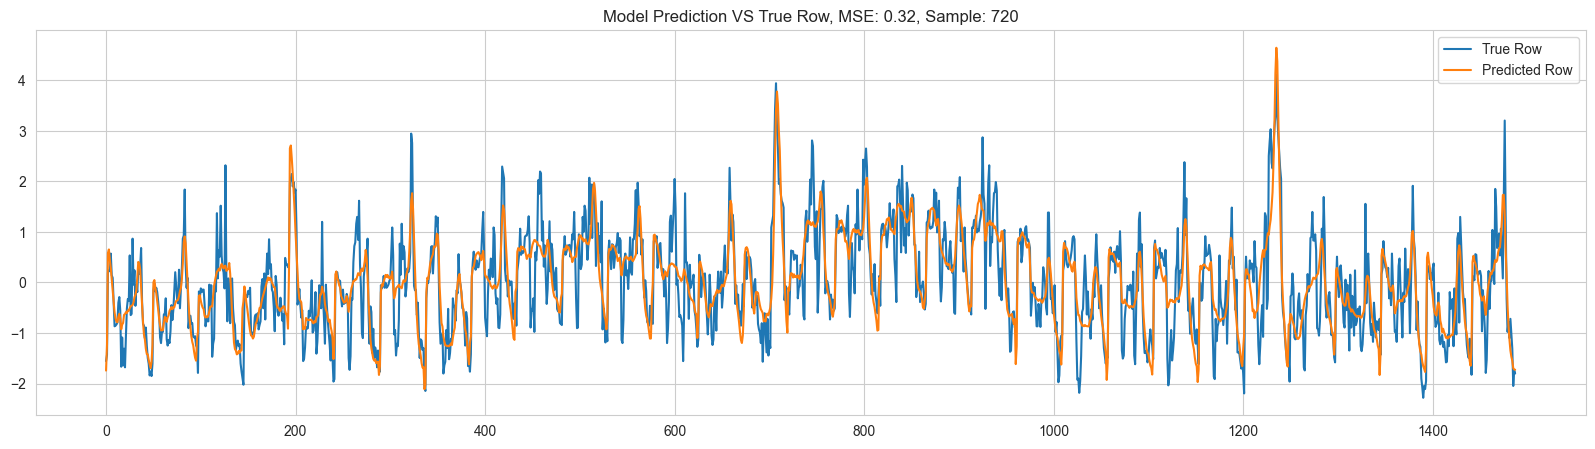

In [132]:
plot_sample(720)

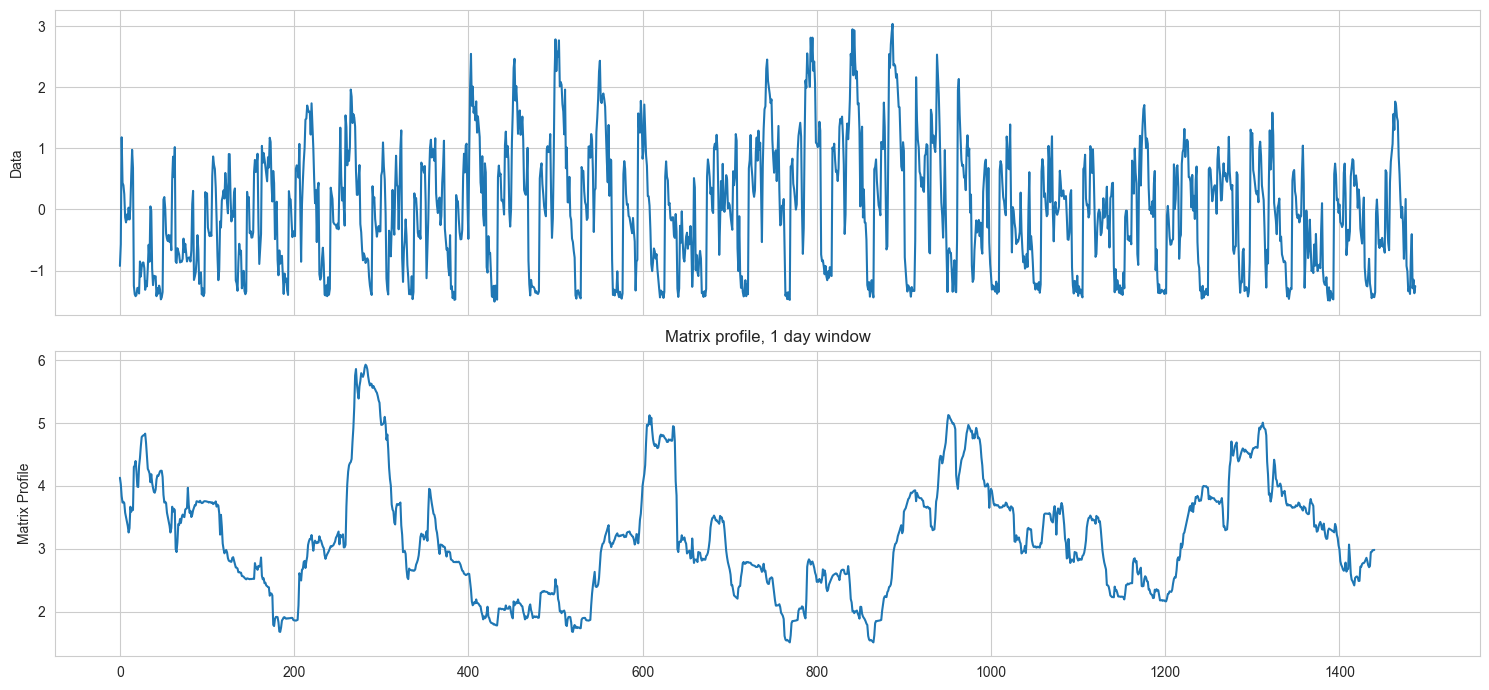

In [134]:
def mprofile(ts):
    profile = mp.compute(ts, windows=48)
    figures = mp.visualize(profile)
    ax = plt.gca()
    ax.set_title(f'Matrix profile, 1 day window')

mprofile(data[647])